# Generalization to a general interevent interval

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pwl
from matplotlib import cm
from statsmodels.regression import linear_model as sm
from scipy.signal import find_peaks
from scipy import signal
from scipy.stats import percentileofscore
import numpy as np

In [2]:
#### Code like Wessel et al. 2015, Nature Physics: non riesco mi sa

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def OU(T,dt, tau, sigma):
    N = int(T/dt)
    x = np.zeros(N)
    for t in range(N-1):
        x[t+1] = x[t] -x[t]/tau*dt + sigma*np.random.normal()*np.sqrt(dt)
    return x

In [5]:
#T = 8000
#dt = 0.002
### I'm running two Ornstein Uhlenbeck processes to simulate two EEG signals (working as if I have two channels)
#x1 = OU(T,dt,4,3)

In [6]:
T = 1000
dt = 0.002
### I'm running two Ornstein Uhlenbeck processes to simulate two EEG signals (working as if I have two channels)
x1 = OU(T,dt,4,3)
x2 = OU(T,dt,4,3)
x3 = OU(T,dt,4,3)
x4 = OU(T,dt,4,3)
x5 = OU(T,dt,4,3)
x6 = OU(T,dt,4,3)
x7 = OU(T,dt,4,3)
x8 = OU(T,dt,4,3)


channels = np.array([x1,x2,x3,x4,x5,x6,x7,x8])
channels.shape

(8, 500000)

In [7]:
#8000*0.001

In [159]:
np.arange(0,5,)

array([0, 1, 2, 3, 4])

In [160]:
t = np.arange(0,T,dt)
t.shape[0]/500

1000.0

In [181]:

thr = 2.3
o = 0
final_t = np.zeros(channels[0].shape)
#o = 0
for i in channels:
    final_t += np.array(np.abs(i)> np.std(i)*thr, dtype = float)
    #o+= 1
#print(o)
final_t = np.array(final_t, dtype = bool)
final_t = np.array(final_t, dtype = float)

final_t.shape, channels.shape

((500000,), (8, 500000))

In [182]:
### Generalizzazione a un intervallo generico

interv = int(500*0.8) ## non può essere + alto di frequenza di campionamento nqyst?
# 5 secondi

if len(final_t)%interv > 0:

    add = (int(len(final_t)/interv) + 1)* interv - len(final_t)
    final_t = final_t.tolist()
    for i in range(add):
        final_t+= [0]

final_t = np.asarray(final_t).reshape(int(len(final_t)/interv), interv)
new = np.array(np.array(np.sum(final_t,axis = 1),dtype = bool), dtype = float)

final_t.shape,new.shape

((1250, 400), (1250,))

In [78]:
interv

15

In [183]:


av_indice_start = np.where(np.diff(new) >0)[0]### these are the indices where an avalanche begins
av_indice_end = np.where(np.diff(new)< 0)[0] ### these are the indices where an avalanche ends + 1
#new = np.array(np.sum(n,axis = 1),dtype = int)
print(len(av_indice_start),len(av_indice_end))

147 146


In [168]:

from matplotlib import cm
colors = cm.Reds(np.linspace(0.2,1,8))

In [184]:
av_indice_start,av_indice_end

(array([   7,   13,   20,   24,   28,   40,   44,   51,   54,   67,   71,
          84,   88,   97,  105,  110,  126,  134,  136,  139,  142,  149,
         157,  171,  178,  187,  189,  193,  195,  211,  227,  233,  239,
         248,  254,  263,  273,  281,  283,  287,  290,  299,  302,  315,
         320,  326,  329,  333,  337,  349,  361,  368,  383,  388,  399,
         403,  406,  418,  465,  471,  476,  484,  491,  496,  503,  508,
         514,  525,  541,  554,  561,  574,  587,  596,  598,  606,  622,
         631,  640,  653,  657,  666,  679,  684,  712,  717,  727,  736,
         738,  743,  745,  748,  754,  762,  765,  770,  778,  782,  787,
         797,  804,  816,  836,  852,  870,  902,  917,  927,  934,  937,
         946,  949,  954,  960,  969,  974,  978,  980,  982,  994, 1002,
        1041, 1045, 1048, 1061, 1064, 1083, 1085, 1089, 1100, 1102, 1110,
        1125, 1130, 1132, 1141, 1156, 1169, 1176, 1179, 1185, 1194, 1213,
        1217, 1233, 1241, 1244], dtype

In [185]:
if len(av_indice_start) < len(av_indice_end):
    av_indice_start = np.insert(av_indice_start,0,0)
    
    
if len(av_indice_start) > len(av_indice_end):
    #print(av_indice_end)
    av_indice_end = np.append(av_indice_end,len(x1[::interv])-1)

In [171]:
len(av_indice_start),  len(av_indice_end)

(83, 83)

In [18]:
1000/len(final_t)

0.002

In [19]:
(500*0.9)

450.0

In [186]:

newchan = []
for h in range(channels.shape[0]):
    if len(channels[h])%interv > 0:

        add = (int(len(channels[h])/interv) + 1)* interv - len(channels[h])
        cc = channels[h].tolist()
        for i in range(add):
            cc+= [0]

        dd = np.asarray(cc).reshape(int(len(cc)/interv), interv)
        #print(dd.shape)
        newchan.append(np.mean(dd,axis = 1))
        
        
    else:
        dd = np.asarray(channels[h]).reshape(int(len(channels[h])/interv), interv)
        #print(dd.shape)
        newchan.append(np.mean(dd,axis = 1))
        

In [187]:
newchan = np.asarray(newchan)

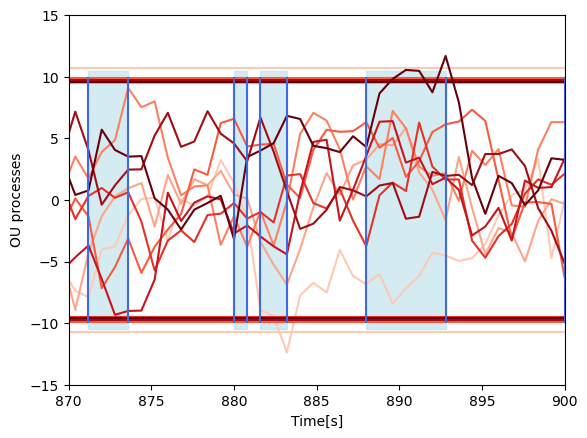

In [189]:
### HO CAMPIONATO
#interv = 0.5*500
for g in range(len(channels)):
    plt.plot(t[::interv],channels[g][::interv],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[::interv][av_indice_start[jj]],t[::interv][av_indice_end[jj]],0.15,1-0.15, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[::interv][av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[::interv][av_indice_end],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(870,900);

plt.ylim(-15,15);

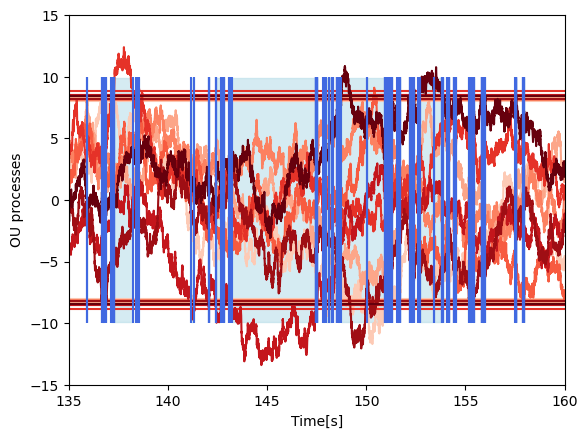

In [173]:
### HO CAMPIONATO
#interv = 0.5*500
for g in range(len(channels)):
    plt.plot(t[::interv],newchan[g],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[::interv][av_indice_start[jj]],t[::interv][av_indice_end[jj]-1],0.17,1-0.17, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[::interv][av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[::interv][av_indice_end-1],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(135,160);

plt.ylim(-15,15);

In [ ]:
interv

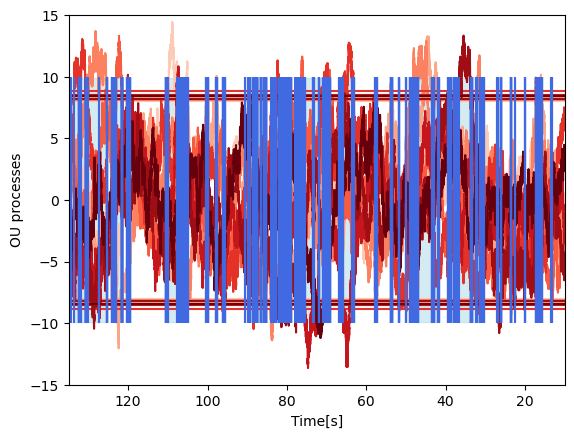

In [176]:
### HO CAMPIONATO
#interv = 0.99*500
for g in range(len(channels)):
    plt.plot(t[::interv],newchan[g],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[::interv][av_indice_start[jj]],t[::interv][av_indice_end[jj]-1],0.17,1-0.17, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[::interv][av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[::interv][av_indice_end-1],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(135,10);
plt.ylim(-15,15);

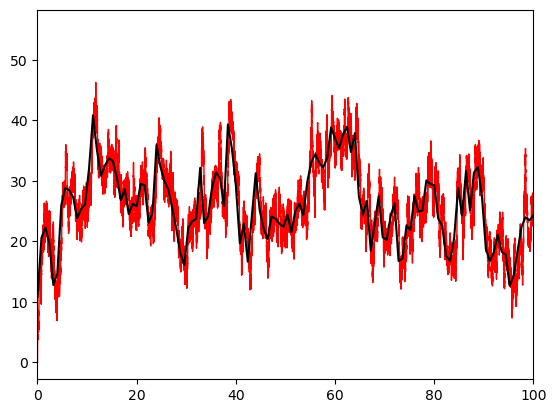

In [190]:
global_signal = np.zeros(channels[0].shape)
for i in channels:
    global_signal+= np.abs(i)
    
#plt.plot(t,np.abs(x1) )
#plt.plot(t,np.abs(x2) )
plt.plot(t,global_signal,'r' , lw  =1)




if len(global_signal)%interv > 0:

    add = (int(len(global_signal)/interv) + 1)* interv - len(global_signal)
    global_signal = global_signal.tolist()
    for i in range(add):
        global_signal+= [0]

global_signal2 = np.asarray(global_signal).reshape(int(len(global_signal)/interv), interv)
gglobal_signal2 = np.mean(global_signal2,axis = 1)


plt.plot(t[::interv],gglobal_signal2,'k' )
plt.xlim(0,100);


In [ ]:
t[::1].shape

In [191]:
global_signal = np.zeros(channels[0].shape)




interv = 1
#int(500*0.99) ## non può essere + alto di frequenza di campionamento
# 5 secondi


for i in channels:
    global_signal+= np.abs(i)
print(global_signal.shape)

if len(global_signal)%interv > 0:

    add = (int(len(global_signal)/interv) + 1)* interv - len(global_signal)
    global_signal = global_signal.tolist()
    for i in range(add):
        global_signal+= [0]

global_signal2 = np.asarray(global_signal).reshape(int(len(global_signal)/interv), interv)
gglobal_signal2 = np.mean(global_signal2,axis = 1)
    
print(gglobal_signal2.shape, t[::interv].shape)
avalanche_sizes = []
avalanche_dur = []

for s in range(len(av_indice_start)):
    if len(av_indice_start) != len(av_indice_end):
        print('Error, they must be of the same length')
        break
    avalanche_sizes.append(np.sum(gglobal_signal2[av_indice_start[s]:av_indice_end[s]]))
    avalanche_dur.append(t[::interv][av_indice_end[s]-1]- t[av_indice_start[s]])
    

(500000,)
(500000,) (500000,)


In [179]:

def binning(n, interv): 
    """
    Bins the data with the temporal bin "interv" and detects avalanches (one avalanche ends when an empty bin is found)
    
    Parameters
    n : # of events in each temporal frame (returned by the function "events")
    interv : temporal bin. Typical width is the one of the average inter event interval (returned by "avinterv")
    --------
    Returns
    --------
    A list containing the sizes of the avalanches and a list containing the durations of the avalanches.
    """
    
    if len(n)%interv > 0:
    
        add = (int(len(n)/interv) + 1)* interv - len(n)
        n = n.tolist()
        for i in range(add):
            n = n + [0]
        
    n = np.asarray(n).reshape(int(len(n)/interv), interv)
    
    new = np.array(np.sum(n,axis = 1),dtype = int)
    
    init = []
    end = []
 
    prova = new>0
    
    start = np.where(np.diff(prova)>1)[0]
    end = np.where(np.diff(prova)<1)[0]
    
    
    if len(start)< len(end):
        np.insert(start,0,0)
        
    
    if len(end)< len(start):
        np.insert(end,-1,len(new))
            
    avalanches = []

    for s in range(len(init)):
        avalanches.append(new[start[s]:end[s]])

    sizes = []
    durations = []
    for l in range(len(avalanches)):
        sizes.append(np.sum(avalanches[l]))
        durations.append(len(avalanches[l]))
        
    return sizes, durations

    

In [24]:
def thresholdnuova(sample1,means,stds,thres):
    """ 
    Detects as events the points of maximum excursion over a threshold, considering either positive and negative excursions or only negative. if "option1" is selected, the one largest maximum between two crossings of the mean assigns the final event time.
    For a faster thresholding use the function below findpeaks.
    
    Parameters
    --------
    sample1 : tri or bidimensional array of recorded voltages (or even single time series from one electrode) (shape = temporal dim x spatial dim1 (x  spatial dim2) ) 
    means : array of the means of the signals (shape = spatial dim1 (x spatial dim2) ) 
    stds : array of the thresholds for each channel (standard deviations/medians...) (shape = spatial dim1 (x spatial dim2)
    thres : multiplicative coefficent for the thresholds
    choose : if "posneg" both positive and negative deflections are considered, if "neg" only negative
    opz : if "option1" the one largest maximum between two crossings of the mean assigns the final event time, if "option2" an event is simply the point of maximum excursion over a threshold
    
    Returns
    --------
    sample2 : discretized array with the initial shape 
    """
    initshape = sample1.shape
    if sample1.ndim > 2:
        sample1 = sample1.reshape(sample1.shape[0],-1)
        means = means.reshape(-1,)
        stds = stds.reshape(-1,)
        
    if sample1.ndim == 1: # so this same code works even when considering a single time series
        sample1 = sample1.reshape(sample1.shape[0],1,1)
        means = means.reshape(1,1)
        stds = stds.reshape(1,1)
        
    if sample1.shape[1] > sample1.shape[0]:
         raise Exception('Error, the array must be transposed (first dimension should be time)')

    sample2 = np.zeros(sample1.shape, dtype = int)

    for s in range(sample1.shape[1]):
        if stds[s]>0:
            sig = sample1[:,s].reshape(-1)
            stan = stds[s]
            tempi = np.arange(0,len(sig),1)
            prova =np.array((sig - means[s]) <= -thres*stan, dtype = float)
            init = np.where(np.diff(prova)>0)[0]
            end = np.where(np.diff(prova)<0)[0] 
            if len(init) < len(end):
                init = np.insert(init,0,0)

            if len(end) < len(init):
                end = np.append(end,len(sig))

            #print(len(init), len(end))
            groups = []
            times = []
            for l in range(len(init)):
                groups.append(np.abs(sig[init[l]:end[l]]-means[s]))##
                times.append(tempi[init[l]:end[l]])
            #print(groups)
            zeta = []
            for m in range(len(groups)):
                zeta.append(times[m][groups[m].tolist().index(max(groups[m]))])
            sample2[zeta,s] = 1
            
    return sample2.reshape(initshape)

In [25]:
v = thresholdnuova(x1, np.mean(x1), np.std(x1),1)

In [ ]:
np.mean(x1), np.std(x1)

In [28]:
total = np.arange(0,T,dt)

(30.0, 50.0)

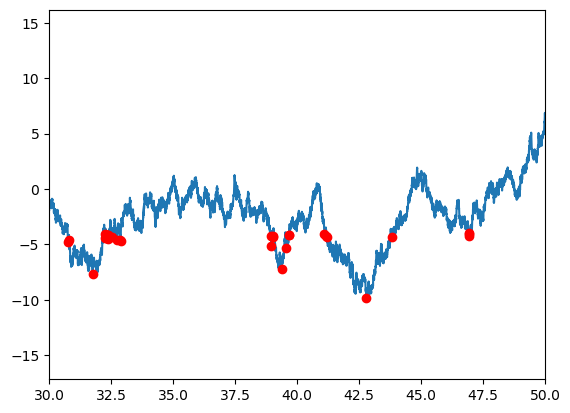

In [29]:
plt.plot(total, x1)
plt.plot(total[v>0], x1[v>0], 'ro')
plt.xlim(30,50)

In [30]:
def thresholdnuova2(sample1,means,stds,thres):
    """ 
    Detects as events the points of maximum excursion over a threshold, considering either positive and negative excursions or only negative. if "option1" is selected, the one largest maximum between two crossings of the mean assigns the final event time.
    For a faster thresholding use the function below findpeaks.
    
    Parameters
    --------
    sample1 : tri or bidimensional array of recorded voltages (or even single time series from one electrode) (shape = temporal dim x spatial dim1 (x  spatial dim2) ) 
    means : array of the means of the signals (shape = spatial dim1 (x spatial dim2) ) 
    stds : array of the thresholds for each channel (standard deviations/medians...) (shape = spatial dim1 (x spatial dim2)
    thres : multiplicative coefficent for the thresholds
    choose : if "posneg" both positive and negative deflections are considered, if "neg" only negative
    opz : if "option1" the one largest maximum between two crossings of the mean assigns the final event time, if "option2" an event is simply the point of maximum excursion over a threshold
    
    Returns
    --------
    sample2 : discretized array with the initial shape 
    """
    initshape = sample1.shape
    if sample1.ndim > 2:
        sample1 = sample1.reshape(sample1.shape[0],-1)
        means = means.reshape(-1,)
        stds = stds.reshape(-1,)
        
    if sample1.ndim == 1: # so this same code works even when considering a single time series
        sample1 = sample1.reshape(sample1.shape[0],1,1)
        means = means.reshape(1,1)
        stds = stds.reshape(1,1)
        
    if sample1.shape[1] > sample1.shape[0]:
         raise Exception('Error, the array must be transposed (first dimension should be time)')

    sample2 = np.zeros(sample1.shape, dtype = int)

    for s in range(sample1.shape[1]):
        if stds[s]>0:
            sig = sample1[:,s].reshape(-1)
            stan = stds[s]
            tempi = np.arange(0,len(sig),1)
            prova =np.array((sig - means[s]) <= -thres*stan, dtype = float)
            
            changesign = np.diff(np.sign(sig[:]-means[s]))
            
            
            #changesign1 = np.hstack((changesign1,0.))
            

            initsign = np.where((changesign)<0)[0]
            endsign = np.where((changesign)>0)[0]

            init = np.where(np.diff(prova)>0)[0]
            end = np.where(np.diff(prova)<0)[0]
            #print(len(initsign) ==len(endsign))
            #print(len(sig),len(initsign),len(init), len(end))
            if len(init) < len(end):
                init = np.insert(init,0,0)

            if len(end) < len(init):
                end = np.append(end,len(sig)) ###???

            #print(init, end)
            groups = []
            times = []
            
            #intss = []
            #endss = []
            
                        
            initss = []
            endss = []

            a = 0
            f = 0
            k = 0
            endss = []
            initss = []
            #g = 0 
            o = 0
            while f < len(end):
                if not len((set(np.arange(init[a], end[f],1)) & set(initsign[:]))):
                    if (init[a]> end[f]):print('STRANGe')
                    
                    k+=1
                    f+=1
                   # o+=1

                else:
                    if k> 0:
                        endss.append(end[f-1])
                        initss.append(init[a])
                        a += (k)
                        k = 0
                
            if not len((set(np.arange(init[a], end[-1],1)) & set(initsign[:]))):
                        endss.append(end[-1])
                        initss.append(init[a])
     
            for l in range(len(initss)):
                groups.append((sig[initss[l]:endss[l]]-means[s]))##
                times.append(tempi[initss[l]:endss[l]])
            zeta = []
            for m in range(len(groups)):
                zeta.append(times[m][groups[m].tolist().index(min(groups[m]))])
            sample2[zeta,s] = 1
            
    return sample2.reshape(initshape)

In [31]:
total = np.arange(0,T,dt)

In [32]:
v = thresholdnuova(x1,np.mean(x1),np.std(x1),1.5)

v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),1.5)

In [267]:
sig = x1
#sample1[:,s].reshape(-1)
stan = np.std(sig)
thres = 1.5
#tds[s]
tempi = np.arange(0,len(sig),1)
prova =np.array((sig - np.mean(sig)) <= -thres*stan, dtype = float)

changesign = np.diff(np.sign(sig[:]-np.mean(sig)))


#changesign1 = np.hstack((changesign1,0.))


initsign = np.where((changesign)<0)[0]
endsign = np.where((changesign)>0)[0]

init = np.where(np.diff(prova)>0)[0]
end = np.where(np.diff(prova)<0)[0]
#print(len(initsign) ==len(endsign))
#print(len(sig),len(initsign),len(init), len(end))
if len(init) < len(end):
    init = np.insert(init,0,0)

if len(end) < len(init):
    end = np.append(end,len(sig)) ###???

#print(init, end)
groups = []
times = []

#intss = []
#endss = []


initss = []
endss = []

a = 0
f = 0
k = 0
endss = []
initss = []
#g = 0 
o = 0
while f < len(end):
    if not len((set(np.arange(init[a], end[f],1)) & set(initsign[:]))):
        if (init[a]> end[f]):print('STRANGe')
        if k == 1: print('started new avalanche avalanche')
        k+=1
        f+=1
       # o+=1

    else:
        if k> 0:
            endss.append(end[f-1])
            initss.append(init[a])
            print('Resetting',a, k)
            
            a += (k)
            #f+=1
            k = 0
            

        else:
            #a +-1 
            print('here')
            endss.append(end[f-1])
            initss.append(init[a])
            k = 0
            a+=1
            #f+=1
            #k+=1
if not len((set(np.arange(init[a], end[-1],1)) & set(initsign[:]))):
            endss.append(end[-1])
            initss.append(init[a])


started new avalanche avalanche
Resetting 0 32
started new avalanche avalanche
Resetting 32 86
started new avalanche avalanche
Resetting 118 10
started new avalanche avalanche
Resetting 128 7
started new avalanche avalanche
Resetting 135 9
started new avalanche avalanche
Resetting 144 34
started new avalanche avalanche
Resetting 178 39
started new avalanche avalanche
Resetting 217 2
started new avalanche avalanche
Resetting 219 20
started new avalanche avalanche
Resetting 239 10
started new avalanche avalanche
Resetting 249 19
Resetting 268 1
started new avalanche avalanche
Resetting 269 8
started new avalanche avalanche
Resetting 277 29
started new avalanche avalanche
Resetting 306 4
started new avalanche avalanche
Resetting 310 9
started new avalanche avalanche
Resetting 319 4
started new avalanche avalanche
Resetting 323 42
started new avalanche avalanche
Resetting 365 40
started new avalanche avalanche
Resetting 405 12
started new avalanche avalanche
Resetting 417 8
started new ava

Resetting 2944 49
started new avalanche avalanche
Resetting 2993 16
started new avalanche avalanche
Resetting 3009 32
started new avalanche avalanche
Resetting 3041 2
started new avalanche avalanche
Resetting 3043 49
started new avalanche avalanche
Resetting 3092 6
started new avalanche avalanche
Resetting 3098 2
started new avalanche avalanche
Resetting 3100 7
started new avalanche avalanche
Resetting 3107 2
Resetting 3109 1
started new avalanche avalanche
Resetting 3110 6
started new avalanche avalanche
Resetting 3116 57
started new avalanche avalanche
Resetting 3173 8
started new avalanche avalanche
Resetting 3181 22
started new avalanche avalanche
Resetting 3203 2
started new avalanche avalanche
Resetting 3205 12
started new avalanche avalanche
Resetting 3217 14
started new avalanche avalanche
Resetting 3231 34
started new avalanche avalanche
Resetting 3265 12
started new avalanche avalanche
Resetting 3277 10
started new avalanche avalanche
Resetting 3287 61
started new avalanche a

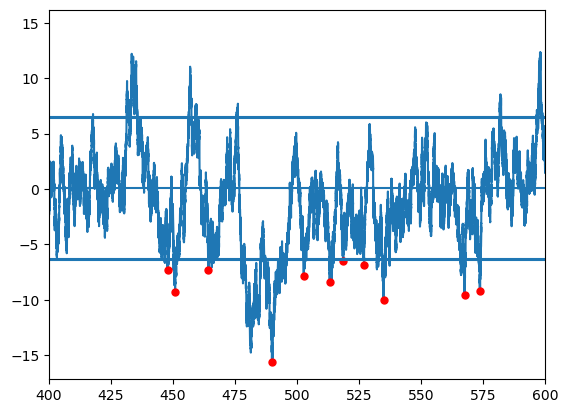

In [46]:

plt.plot(total, x1)
plt.plot(total[v2>0], (x1)[v2>0], 'ro',markersize = 5)

plt.hlines(np.mean(x1) + np.std(x1)*1.5,0,T)
plt.hlines(np.mean(x1) ,0,T)

plt.hlines(np.mean(x1) -np.std(x1)*1.5,0,T)
#v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),2.5)

#plt.xlim(86,89)
#plt.xlim(7800,8000)
plt.hlines( np.std(x1)*1.5,0,T)
plt.hlines( -np.std(x1)*1.5,0,T)
plt.xlim(400,600);

In [183]:
v = thresholdnuova(x1,np.mean(x1),np.std(x1),1.5)

v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),1.5)

(800.0, 900.0)

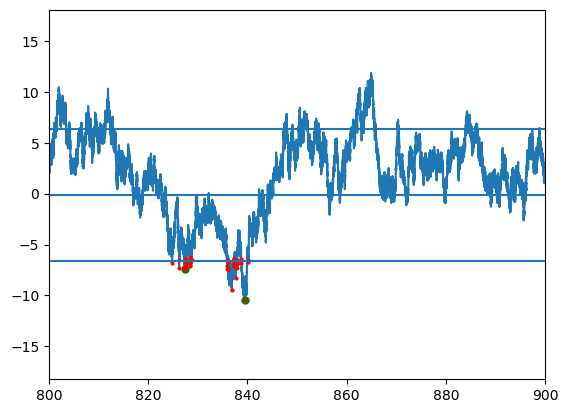

In [266]:
#v = thresholdnuova(x1,np.mean(x1),np.std(x1),2.5)
plt.plot(total, x1)

plt.plot(total[v2>0], (x1)[v2>0], 'go',markersize = 5)


plt.plot(total[v>0], (x1)[v>0], 'ro',markersize = 2)




plt.hlines(np.mean(x1) + np.std(x1)*1.5,0,1000)
plt.hlines(np.mean(x1) ,0,1000)

plt.hlines(np.mean(x1) -np.std(x1)*1.5,0,1000)
#v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),2.5)


#plt.plot(total, x1-np.mean(x1))

plt.xlim(800,900)

(600.0, 800.0)

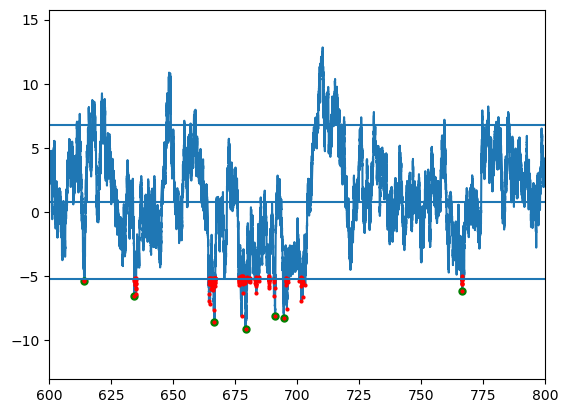

In [185]:
#v = thresholdnuova(x1,np.mean(x1),np.std(x1),2.5)
plt.plot(total, x1)

plt.plot(total[v2>0], (x1)[v2>0], 'go',markersize = 5)


plt.plot(total[v>0], (x1)[v>0], 'ro',markersize = 2)




plt.hlines(np.mean(x1) + np.std(x1)*1.5,0,1000)
plt.hlines(np.mean(x1) ,0,1000)

plt.hlines(np.mean(x1) -np.std(x1)*1.5,0,1000)
#v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),2.5)


#plt.plot(total, x1-np.mean(x1))

plt.xlim(600,800)


(0.0, 100.0)

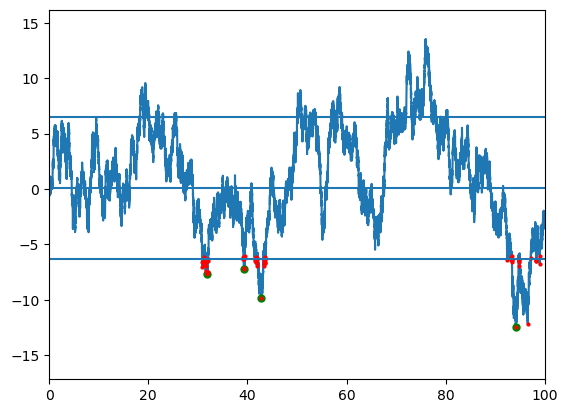

In [38]:
#v = thresholdnuova(x1,np.mean(x1),np.std(x1),2.5)
plt.plot(total, x1)

plt.plot(total[v2>0], (x1)[v2>0], 'go',markersize = 5)


plt.plot(total[v>0], (x1)[v>0], 'ro',markersize = 2)




plt.hlines(np.mean(x1) + np.std(x1)*1.5,0,1000)
plt.hlines(np.mean(x1) ,0,1000)

plt.hlines(np.mean(x1) -np.std(x1)*1.5,0,1000)
#v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),2.5)


#plt.plot(total, x1-np.mean(x1))

plt.xlim(0,100)
## ancora qualcosa che non va

(0.0, 100.0)

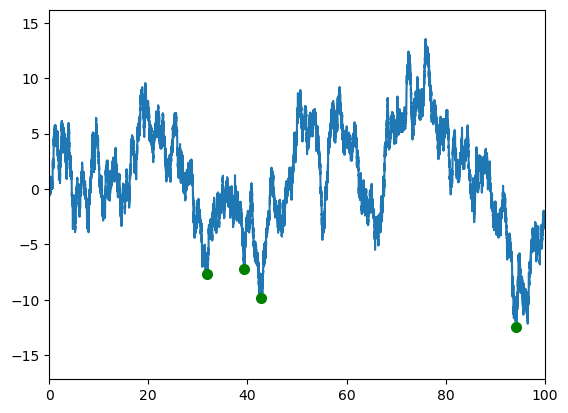

In [39]:
plt.plot(total, x1)


plt.plot(total[v2>0], x1[v2>0], 'go', markersize = 7)
plt.xlim(0,100)